In [4]:
import pandas as pd
import numpy as np
import ast
import numpy as np
from pymongo import MongoClient

In [4]:
import gc # garbage collector
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm # progress bar
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.preprocessing import LabelEncoder

# Connexion à MongoDB
client = MongoClient("mongodb://localhost:27017/Scibio")  # Remplacez par l'URL de votre serveur MongoDB
db = client["Scribio"]  # Nom de la base de données

def fetch_data(nom_collection: str, nbr: int):
    collection = db[nom_collection]  # Nom de la collection
    documents = collection.find()
    print(f"fetch {nom_collection} OK !!!")

    images = []
    labels = []
    types = []
    
    # Parcours et transformation des photos avec barre de progression 
    with tqdm(total=nbr, desc="Proccessing" , position=0, leave=True) as pbar:
        for doc in documents:
            images.append(np.array(doc["Tableau_Pixels"], dtype=np.float32))
            labels.append(doc["Label"])
            types.append(doc["Type"])
            pbar.update(1) # Mettre à jour la barre de progression
            
    # return np.array(images), np.array(labels, dtype=str)
    return pd.DataFrame({"Labels": labels, "Types": types, "Images": images})

df_maj_test = fetch_data("Dataset_Maj_test", 689_936)
df_maj_test = df_maj_test.sample(frac=1).reset_index(drop=True)
print(df_maj_test.shape)
df_maj_test.head()

fetch Dataset_Maj_test OK !!!


Proccessing: 100%|██████████| 689936/689936 [00:42<00:00, 16364.62it/s]


(689936, 3)


,Labels,Types,Images
0,I,Maj,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,J,Maj,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,C,Maj,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,U,Maj,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,D,Maj,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [46]:
df_maj_test.iloc[4]["Images"]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
array_2d = df_maj_test.iloc[4]["Images"].reshape(25, 25)
array_2d

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [48]:
not_scaled = array_2d * 255
not_scaled

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,
         96., 131., 128., 128., 130., 110.,  12.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,  82., 203.,
        255., 255., 255., 255., 255., 255., 171.,  

In [56]:
tab1 = []
tab2 = []
cpt = 0
print(len(df_maj_test.iloc[4]["Images"]))
for i in range(len(df_maj_test.iloc[4]["Images"])):
    cpt += 1
    tab2.append(df_maj_test.iloc[4]["Images"][i])
    if cpt % 25 == 0:
        tab1.append(tab2)
        tab2 = []
        
print(len(tab1))
print("------------------")
for i in range(len(tab1)):
    if len(tab1[i]) != 25:
        print(len(tab1[i]))

625
25
------------------


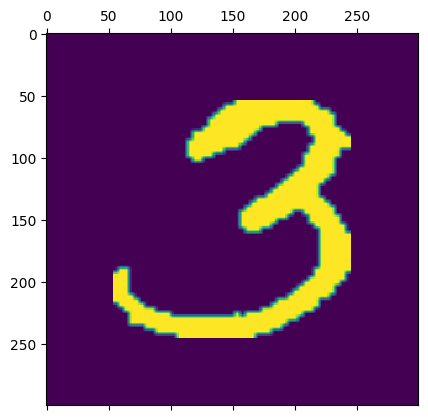

In [7]:
import tensorflow as tf
import numpy as np # linear algebra
from tqdm import tqdm # progress bar
from PIL import Image, ImageOps # image processing
import matplotlib.pyplot as plt

chemin_image = "../../Dataset/datasetDigit/train/3/000020.png"

img = Image.open(chemin_image) # 300 x 300
    
nouvelle_taille = (25, 25) # 625

# img = img.resize(nouvelle_taille) # Redimensionner l'image
nb_image = img.convert('L') # Convertion en noir et blanc

tab = []
for i in range(nb_image.size[1]):
    row = []
    for y in range(nb_image.size[0]):
        # Récupérer la couleur du pixel
        row.append(nb_image.getpixel((y, i)))
    tab.append(row)
    
tab_numpy = np.array(tab)
    
plt.matshow(tab_numpy) # faire apparaitre l'image grace à matplotlib

In [ ]:
plt.matshow(tab1) # faire apparaitre l'image grace à matplotlib

In [9]:
truc = np.array([[1, 3, 4], [3, 5, 56]])
truc

array([[ 1,  3,  4],
       [ 3,  5, 56]])

In [10]:
bidule = np.array2string(truc, separator=', ')
bidule = bidule.replace('\n', '')
bidule

'[[ 1,  3,  4], [ 3,  5, 56]]'

In [11]:
machin = np.array(ast.literal_eval(bidule))
machin

array([[ 1,  3,  4],
       [ 3,  5, 56]])

In [13]:
import numpy as np

# Création d'un tableau numpy
array = np.array([0.0, 0.1234567, 0.456, 0.131123], dtype=float)

# Ajuster le format d'impression avec des options personnalisées
np.set_printoptions() #formatter={'float': '{:0.8f}'.format})

# Convertir en chaîne
array_as_string = np.array2string(array, separator=", ")

print(array_as_string)

[0.  , 0.12, 0.46, 0.13]


In [19]:
import numpy as np

# Exemple de tableaux
array1 = np.array([1, 2, 3])
array2 = np.array([[4, 5, 6], [7, 8, 9]])

array1 = np.append(array1, 4)

# Sauvegarder plusieurs tableaux dans un fichier .npz
np.savez("arrays.npz", tableau1=array1, tableau2=array2)

# Charger les tableaux depuis le fichier .npz
data = np.load("arrays.npz")

print("type de data :", type(data))  # <class 'numpy.lib.npyio.NpzFile'>
print("Nom des tableaux :", data.files)  # ['tableau1', 'tableau2']*
print("tableau 1 :", data["tableau1"])  # [1 2 3]
print("tableau 2 :", data["tableau2"])  # [[4 5 6] [7 8 9]]

type de data : <class 'numpy.lib.npyio.NpzFile'>
Nom des tableaux : ['tableau1', 'tableau2']
tableau 1 : [1 2 3 4]
tableau 2 : [[4 5 6]
 [7 8 9]]


In [18]:
import sys

data = np.load("https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz")

# Inspecter les clés du fichier
print(data.files)

print(sys.getsizeof(data))

OSError: [Errno 22] Invalid argument: 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

In [22]:
print("../Dataset")
print("   /dataset")
print("      /test")
print("        /M")

../Dataset
   /dataset
      /test
        /M


In [1]:
from PIL import Image, ImageOps

# Ouvrir une image
# image = Image.open("../../Dataset/dataset/test/R/000000.png")
image = Image.open("../img/A.jpg")

# Effectuer une rotation (exemple : 45 degrés)
nouvelle_taille = (25, 25) # 2500 
img_finale = image.resize(nouvelle_taille) # Redimensionner l'image
img_finale = img_finale.rotate(0, expand=True)
img_finale = img_finale.convert('L') # Convertion en noir et blanc

# Inverser les couleurs
# img_finale = ImageOps.mirror(img_finale)

# Afficher l'image après rotation
img_finale.show()

# Sauvegarder l'image après rotation
# img_finale.save("../img/A_mirror_90.png")

In [3]:
import gridfs
from pymongo import MongoClient

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['Test']

# Utilisation de GridFS
fs = gridfs.GridFS(db)

# Lire l'image et la stocker
with open("../../Dataset/datasetSmall/validation/b/000000.png", "rb") as fichier:
    fs.put(fichier, filename="image_stockee.jpg")

print("Image stockée avec succès dans MongoDB !")

Image stockée avec succès dans MongoDB !


In [ ]:
import cv2
import numpy as np

# Charger l'image
image = cv2.imread('../img/A.jpg')

# Convertir en niveaux de gris pour mieux identifier les zones brillantes
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Seuillage pour créer un masque des zones brillantes
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Inpainting pour corriger les reflets
result = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# Afficher l'image corrigée
cv2.imshow('Image corrigée', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# Connexion à MongoDB
client = MongoClient("mongodb://localhost:27017/Scibio")  # Remplacez par l'URL de votre serveur MongoDB
db = client["Scribio"]  # Nom de la base de données
collection = db["Test"]  # Nom de la collection

In [7]:
# Créer un tableau NumPy
tableau_numpy = np.array([[1, 2, 3], [4, 5, 6]])

# Convertir le tableau NumPy en une liste
tableau_liste = tableau_numpy.tolist()

# Insérer le tableau dans MongoDB
document = {"nom_tableau": "mon_tableau", "donnees": tableau_liste}
resultat = collection.insert_one(document)

# Afficher l'ID du document inséré
print("Document inséré avec l'ID :", resultat.inserted_id)


Document inséré avec l'ID : 677fdada94491e5e74338b8f


In [4]:
# Récupérer le document depuis MongoDB
document_recupere = collection.find({"nom_tableau": "mon_tableau"})
df = pd.DataFrame(list(document_recupere))
print(type(df.iloc[0]["donnees"]))
df

<class 'list'>


,_id,nom_tableau,donnees
0,677fd90b94491e5e74338b8c,mon_tableau,"[[1, 2, 3], [4, 5, 6]]"
1,677fdad894491e5e74338b8d,mon_tableau,"[[1, 2, 3], [4, 5, 6]]"
2,677fdad994491e5e74338b8e,mon_tableau,"[[1, 2, 3], [4, 5, 6]]"
3,677fdada94491e5e74338b8f,mon_tableau,"[[1, 2, 3], [4, 5, 6]]"


In [3]:
from tqdm import tqdm # progress bar
import time
# Parcours et transformation des photos avec barre de progression 
with tqdm(total=25, desc="Proccessing" , position=0, leave=True) as pbar:
    for i in range(50):
        time.sleep(1)
        pbar.update(1) # Mettre à jour la barre de progression

Proccessing: 50it [00:50,  1.00s/it]                        


In [5]:
img = Image.open("../Dataset/dataset/test/A/000000.png") # 300 x 300
nouvelle_taille = (50, 50) # 2500
img_redimensionnee = img.resize(nouvelle_taille) # Redimensionner l'image
nb_image = img_redimensionnee.convert('L') # Convertion en noir et blanc

NameError: name 'Image' is not defined

In [1]:
import cv2
import numpy as np
import os

def segment_letters(image_path, output_folder):
    # Chargement de l'image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    print(img)
    
    # Binarisation (Seuillage)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Trouver les contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Trier les contours de gauche à droite
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    # Créer le dossier de sortie si nécessaire
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Découper et sauvegarder chaque lettre
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)

        # Ignorer les petits bruits
        if w > 10 and h > 10:  # Ajuster les valeurs selon les besoins
            letter_img = binary[y:y+h, x:x+w]

            # Redimensionner l'image de la lettre (ex : 28x28 pour un réseau MNIST-like)
            resized_letter = cv2.resize(letter_img, (28, 28))

            # Sauvegarder l'image de la lettre
            output_path = os.path.join(output_folder, f"letter_{i}.png")
            cv2.imwrite(output_path, resized_letter)

    print(f"Les lettres ont été segmentées et sauvegardées dans le dossier : {output_folder}")

# Exemple d'utilisation
segment_letters("../img/M.png", "../img/lettres_segmentées")

None
Les lettres ont été segmentées et sauvegardées dans le dossier : ../img/lettres_segmentées


In [2]:
import locale

locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')  # Configuration française
x = 1234567.89
print(locale.format_string("%.2f", x, grouping=True))

x = 1234.56789
print("Le nombre formaté est : {:.2f}".format(x))


1 234 567,89
Le nombre formaté est : 1234.57


In [2]:
import pandas as pd

# Exemple de DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
df3 = pd.DataFrame({'A': [9, 10], 'B': [11, 12]})

# Concaténation verticale (par défaut)
result = pd.concat([df1, df2, df3])

# Mélange plus reset des index
result = result.sample(frac=1).reset_index(drop=True)

print(result)

    A   B
0   2   4
1   1   3
2   9  11
3   5   7
4   6   8
5  10  12


In [7]:
import cv2
import pytesseract

# Spécifiez le chemin vers l'exécutable de Tesseract si vous êtes sur Windows
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'

# Charger l'image
image_path = "../img/M.jpg"
image = cv2.imread(image_path)
# print(image)

# Prétraitement de l'image (conversion en niveaux de gris)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optionnel : améliorer la qualité de l'image
gray = cv2.GaussianBlur(gray, (5, 5), 0)
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Extraire le texte
text = pytesseract.image_to_string(binary_image, lang="fra")  # Langue française si nécessaire
print("Texte extrait :")
print(text)

Texte extrait :



In [ ]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow("Zones detectées", image)
cv2.waitKey(0)